<a href="https://colab.research.google.com/github/Dedulus/Dedulus/blob/main/Diabetes_prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving diabetes.csv to diabetes.csv


{'diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43

In [3]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Conv2D,MaxPooling2D, Flatten

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import pandas as pd

In [6]:
#Reading dataset
data = pd.read_csv('diabetes.csv')

In [7]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
import numpy as np

In [10]:
#Separation of Y and X from Dataset 
Y = np.array(data['Outcome'])
del data['Outcome']
X = np.array(data)

In [11]:
#Splitting of dataset into Training set and testing set (70% and 30% respectively)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [40]:

model = Sequential()
model.add(Dense(32,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
#model.add(Dense(128,input_shape=(X_train.shape[1],)))
#model.add(Activation('relu'))
##model.add(Dense(128,input_shape=(X_train.shape[1],)))
##model.add(Activation('relu'))
model.add(Dense(256,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))


In [41]:
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                288       
                                                                 
 activation_15 (Activation)  (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 64)                2112      
                                                                 
 activation_16 (Activation)  (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 activation_17 (Activation)  (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 256)              

In [42]:
print ("My model has" + " " + str(len(model.layers)) + " " + "layers") # Number of layers in the model

My model has 12 layers


In [43]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="sgd",metrics=['accuracy'])

In [44]:
from tensorflow.keras.optimizers import Adam

In [45]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="Adam",metrics=['accuracy'])

In [46]:
history = model.fit(X_train, Y_train,
                    epochs = 100,
                    validation_data = (X_test, Y_test)
                    )

Epoch 1/100
17/17 [==============================] - 1s 17ms/step - loss: 2.3338 - accuracy: 0.5251 - val_loss: 0.6814 - val_accuracy: 0.6190
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6517 - accuracy: 0.6685 - val_loss: 0.6109 - val_accuracy: 0.6970
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6164 - accuracy: 0.6853 - val_loss: 0.6653 - val_accuracy: 0.6753
Epoch 4/100
17/17 [==============================] - 0s 6ms/step - loss: 0.7284 - accuracy: 0.6741 - val_loss: 0.6356 - val_accuracy: 0.6710
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.5681 - accuracy: 0.7020 - val_loss: 0.6010 - val_accuracy: 0.7100
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.5844 - accuracy: 0.6853 - val_loss: 0.6910 - val_accuracy: 0.6840
Epoch 7/100
17/17 [==============================] - 0s 6ms/step - loss: 0.6346 - accuracy: 0.6853 - val_loss: 0.7609 - val_accuracy: 0.5714
Epoch 8/100


In [47]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [48]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'epoch')

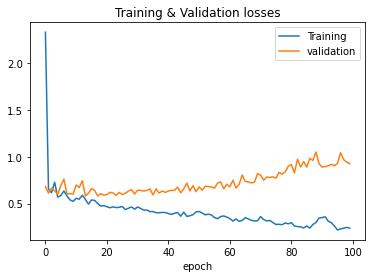

In [49]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'validation'])
plt.title('Training & Validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

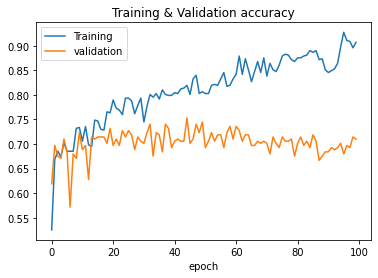

In [50]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'validation'])
plt.title('Training & Validation accuracy')
plt.xlabel('epoch')